# Introduction to Neural Network (Digits Recognition) Model

In [1]:
# image data
from sklearn.datasets import load_digits

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# data processing
import pandas as pd

In [2]:
digits = load_digits()
digits.images.shape

(1797, 8, 8)

### Prepare data for modeling

In [3]:
# grab all data (1797 records, and 8x8=64 columns)
X = digits.data

# grab the target (true) value for each image
y = digits.target

X_train, X_test, y_train_raw, y_test_raw = train_test_split(X, y, random_state=314)

y_train = pd.get_dummies(y_train_raw).values
y_test = pd.get_dummies(y_test_raw).values

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1347, 64) (1347, 10) (450, 64) (450, 10)


Before we start, we need to take a small digression. The keras Neural Network model training results are not easily reproducible since it involves a lot of shuffling and random initializations. In order to maintain consitency, we will have to initialize some random seeds before every model run. We will create a function to do this.

In [4]:
from tensorflow import random as tf_random
import numpy as np
import random

def init_seeds(s):
    '''
    Initializes random seeds prior to model training 
    to ensure reproducibality of training results.
    '''
    tf_random.set_seed(s)
    np.random.seed(s)
    random.seed(s)

2025-03-20 13:14:45.688722: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-20 13:14:45.696099: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742490885.704680   13682 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742490885.707112   13682 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742490885.713562   13682 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

### Multi-layer Perceptron (MLP) model

Define a model with one input layer and one output layer.

In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense

mlp1 = Sequential(
    [
        Input(shape=(64,)),
        Dense(10, activation='softmax')
    ])

mlp1.summary()

W0000 00:00:1742490886.506059   13682 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 650 (2.54 KB)

 Trainable params: 650 (2.54 KB)

 Non-trainable params: 0 (0.00 B)

We have initialized a sequential model with an input shape of 64, and an output layer with a shape of 10. There are 650 total parameters in this model:

In [6]:
# initial weights and biases
mlp1.weights

[<Variable path=sequential/dense/kernel, shape=(64, 10), dtype=float32, value=[[ 7.52240121e-02 -1.48632869e-01 -5.03507406e-02 -2.64095664e-01
   -1.78139359e-01 -3.54363918e-02  2.24034756e-01  1.40006870e-01
    5.69587946e-02  1.82975978e-01]
  [ 2.61306494e-01  1.74193978e-01 -1.11791372e-01  2.63734490e-01
    5.38792908e-02  2.04035908e-01  2.41838127e-01  1.97922826e-01
   -5.53180426e-02  6.85949922e-02]
  [ 1.75955892e-01  2.66568691e-01 -1.92095041e-01  1.76424086e-02
    1.97690785e-01 -2.25105882e-03 -1.08076274e-01 -9.86526608e-02
    1.40988827e-01  1.51267231e-01]
  [-1.40982583e-01 -2.53795147e-01 -2.68876284e-01  2.61355937e-02
    2.28546053e-01  8.72231424e-02  4.23727036e-02  1.63278431e-01
    5.61340153e-02 -2.06314057e-01]
  [-1.61597103e-01 -1.10618249e-01  2.33926982e-01  9.22385156e-02
    1.54019594e-01 -2.39212021e-01  1.23886555e-01 -1.44539699e-01
   -4.75480705e-02  1.39193505e-01]
  [ 7.63928890e-03  2.62100548e-01 -1.75285980e-01  5.75746894e-02
    1.

_**Useful Resources:**_

* [Keras Documentation: The Sequential model](https://keras.io/guides/sequential_model/)
* [TensorFlow API Documentation: tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)

Before we can train the model, we need to specify training parameters (aka compile the model).

In [7]:
mlp1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
mlp1.optimizer

#### Train (fit) the model

In [9]:
mlp1.fit(X_train, y_train, shuffle=False) # shuffle is set to false for reproducibality

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3421 - loss: 5.4009   


The accuracy is very low, because the model made a single pass over the dataset. The model must make multiple passes over the entire dataset in order to produce better results. This can be adjusted by using the `epoch` parameter.

Epoch is equal to the number of times the algorithm sees the entire dataset.

By the way, what is that mysterious-looking number 43? Where did that come from?

Keras uses a `batch size` of 32 by default. So this model above created 32 batches of 43 records each by divinding the total number of records in the entire dataset (1,347) by 32. However, the default `epoch` is 1, so the model above made 43 **iterations** (forward + backward) using batches of 52 records.

`batch_size * number of iterations` --> `epoch`

Note that if you use `shuffle=True` in the `fit()` function, keras will shuffle the records in the training dataset before splitting them into batches.

Let's increase the number of epochs.

In [10]:
# initialize seeds
init_seeds(314)

# prepare the model architecture
mlp2 = Sequential(
    [
        Input(shape=(64,)),
        Dense(10, activation='softmax', name='output_layer')
    ], 
    name='simple_mlp_7epochs')

mlp2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

mlp2.fit(X_train, y_train, epochs=7, shuffle=True);

Epoch 1/7
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.3206 - loss: 6.2484 
Epoch 2/7
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - accuracy: 0.7463 - loss: 1.2792
Epoch 3/7
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.8264 - loss: 0.6769
Epoch 4/7
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.9152 - loss: 0.3119
Epoch 5/7
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.9299 - loss: 0.2606
Epoch 6/7
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - accuracy: 0.9378 - loss: 0.2262
Epoch 7/7
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.9435 - loss: 0.2001


Note that now the model is making 7 passes through the entire data. For each epoch, there are 43 iterations (forward + backward) with 32 samples in each iteration.

Let's try to reduce the batch size and see what happens.

In [11]:
# initialize seeds
init_seeds(314)

# prepare the model architecture
mlp3 = Sequential(
    [
        Input(shape=(64,)),
        Dense(10, activation='softmax', name='output_layer')
    ], 
    name='simple_mlp_7epochs_5bs')

mlp3.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

mlp3.fit(X_train, y_train, batch_size=5, epochs=7, shuffle=True, verbose=2);

Epoch 1/7
270/270 - 0s - 999us/step - accuracy: 0.7535 - loss: 1.6769
Epoch 2/7
270/270 - 0s - 630us/step - accuracy: 0.9087 - loss: 0.4027
Epoch 3/7
270/270 - 0s - 600us/step - accuracy: 0.9473 - loss: 0.2679
Epoch 4/7
270/270 - 0s - 589us/step - accuracy: 0.9517 - loss: 0.2006
Epoch 5/7
270/270 - 0s - 601us/step - accuracy: 0.9666 - loss: 0.1545
Epoch 6/7
270/270 - 0s - 595us/step - accuracy: 0.9644 - loss: 0.1335
Epoch 7/7
270/270 - 0s - 591us/step - accuracy: 0.9740 - loss: 0.0945


The batch size of 5 gives us 270 iterations for each epoch.

**Useful Resources:**
* [Keras FAQ: What do sample, batch, and epoch mean?](https://keras.io/getting_started/faq/#what-do-sample-batch-and-epoch-mean)
* [What is the trade-off between batch size and number of iterations to train a neural network?](https://stats.stackexchange.com/questions/164876/what-is-the-trade-off-between-batch-size-and-number-of-iterations-to-train-a-neu)

Tip: Using larger batch sizes will require more memory, and negatively impact the ability of the model to generalize well. On the other hand, very small batch size increases the risk of making the model unreliable (too stochastic.)

#### Check the model accuracy on the test sample

In [12]:
loss, accuracy = mlp1.evaluate(X_test, y_test, batch_size=1)

print(f'Loss: {loss:.2%}, Accuracy: {accuracy:.2%}')

450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.5640 - loss: 3.1563
Loss: 322.17%, Accuracy: 56.44%


We will use this multiple times, so let's create a small function for this.

In [13]:
def test_model(model, test_data, lables):
    loss, accuracy = model.evaluate(test_data, lables, batch_size=1)
    print(f'Loss: {loss:.2%}, Accuracy: {accuracy:.2%}')
    
test_model(mlp1, X_test, y_test)

450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.5640 - loss: 3.1563
Loss: 322.17%, Accuracy: 56.44%


In [14]:
test_model(mlp2, X_test, y_test)

450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.9458 - loss: 0.1740
Loss: 23.05%, Accuracy: 92.89%


In [15]:
test_model(mlp3, X_test, y_test)

450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.9665 - loss: 0.1673
Loss: 23.62%, Accuracy: 95.33%


The model `mlp3` with a batch size of five and seven epochs seems to be performing the best.

Next, let's add one hidden layer to this model and see how much improvement it yields.

#### Add a hidden layer to the model

In [16]:
# initialize seeds
init_seeds(314)

# prepare the model architecture
mlp4 = Sequential(
    [
        Input(shape=(64,)),
        Dense(32, activation='sigmoid', name='hidden_layer'),
        Dense(10, activation='softmax', name='output_layer')
    ],
    name='mlp_1hidden')

mlp4.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

mlp4.fit(X_train, y_train, batch_size=5, epochs=15, shuffle=True, verbose=2);

Epoch 1/15
270/270 - 0s - 1ms/step - accuracy: 0.3504 - loss: 2.0875
Epoch 2/15
270/270 - 0s - 611us/step - accuracy: 0.6704 - loss: 1.6097
Epoch 3/15
270/270 - 0s - 606us/step - accuracy: 0.7914 - loss: 1.2876
Epoch 4/15
270/270 - 0s - 603us/step - accuracy: 0.8589 - loss: 1.0608
Epoch 5/15
270/270 - 0s - 610us/step - accuracy: 0.8976 - loss: 0.8814
Epoch 6/15
270/270 - 0s - 608us/step - accuracy: 0.9139 - loss: 0.7387
Epoch 7/15
270/270 - 0s - 637us/step - accuracy: 0.9280 - loss: 0.6290
Epoch 8/15
270/270 - 0s - 606us/step - accuracy: 0.9414 - loss: 0.5436
Epoch 9/15
270/270 - 0s - 606us/step - accuracy: 0.9480 - loss: 0.4755
Epoch 10/15
270/270 - 0s - 602us/step - accuracy: 0.9517 - loss: 0.4216
Epoch 11/15
270/270 - 0s - 607us/step - accuracy: 0.9562 - loss: 0.3782
Epoch 12/15
270/270 - 0s - 640us/step - accuracy: 0.9636 - loss: 0.3426
Epoch 13/15
270/270 - 0s - 602us/step - accuracy: 0.9696 - loss: 0.3127
Epoch 14/15
270/270 - 0s - 616us/step - accuracy: 0.9733 - loss: 0.2875
Epo

In [17]:
test_model(mlp4, X_test, y_test)

450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.9603 - loss: 0.2792
Loss: 29.66%, Accuracy: 95.78%


Adding one hidden layer, and increasing the number of epochs, didn't improve the model's accuracy much.

**Interesting questions:**

* [How to choose the number of hidden layers and the size of hidden layers?](https://stackoverflow.com/questions/10565868/multi-layer-perceptron-mlp-architecture-criteria-for-choosing-number-of-hidde?lq=1)
* [Why are neural networks becoming deeper, but not wider?](https://stats.stackexchange.com/questions/222883/why-are-neural-networks-becoming-deeper-but-not-wider)

#### Try a different activation function (relu)

In [18]:
# initialize seeds
init_seeds(314)

# prepare the model architecture
mlp5 = Sequential(
    [
        Input(shape=(64,)),
        Dense(32, activation='relu', name='hidden_layer'),
        Dense(10, activation='softmax', name='output_layer')
    ],
    name='mlp_1hidden_relu')

mlp5.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

mlp5.fit(X_train, y_train, batch_size=5, epochs=15, shuffle=True, verbose=0)

test_model(mlp5, X_test, y_test)

450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.9640 - loss: 0.1288
Loss: 16.25%, Accuracy: 96.22%


Changing the activation function improved the model's performance.

#### Try a different optimizer (adam)

In [19]:
# initialize seeds
init_seeds(314)

# prepare the model architecture
mlp6 = Sequential(
    [
        Input(shape=(64,)),
        Dense(32, activation='relu', name='hidden_layer'),
        Dense(10, activation='softmax', name='output_layer')
    ],
    name='mlp_1hidden_adam')

mlp6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

mlp6.fit(X_train, y_train, batch_size=5, epochs=15, shuffle=True, verbose=0)

test_model(mlp6, X_test, y_test)

450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.9701 - loss: 0.1046
Loss: 13.28%, Accuracy: 96.44%


The adam optimizer didn't improve the model's performance by much.

**Useful resource:**

* [Keras Documentation: Adam](https://keras.io/api/optimizers/adam/)

### Plot confusion matrix

In [20]:
# calculate predicted probabilities
probs = mlp6.predict(X_test)
probs[:2]

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[1.5721264e-15, 9.9999452e-01, 1.3962290e-07, 8.7336304e-08,
        1.8818380e-06, 1.1329800e-08, 1.7754084e-07, 5.3251608e-09,
        3.1061431e-06, 1.0082396e-11],
       [3.3106679e-10, 1.4387006e-05, 9.9987793e-01, 1.0737040e-04,
        3.8049991e-10, 4.5434141e-09, 2.3859121e-07, 8.1208353e-11,
        8.2853413e-09, 5.2951794e-09]], dtype=float32)

In [21]:
# we can use formatted string literal to print float values instead
[f'{x:.5f}' for x in probs[0]]

['0.00000',
 '0.99999',
 '0.00000',
 '0.00000',
 '0.00000',
 '0.00000',
 '0.00000',
 '0.00000',
 '0.00000',
 '0.00000']

The model returns a probability for each lable (digit). We can grab the lable (digit) that has the highest probability. For example, for the first sample, the model is predicting a very high probability of 0.99974 for that digit to be 1.

In [22]:
# grab the digit with max probability
y_preds = [np.argmax(x) for x in probs]
y_preds[:2]

[1, 2]

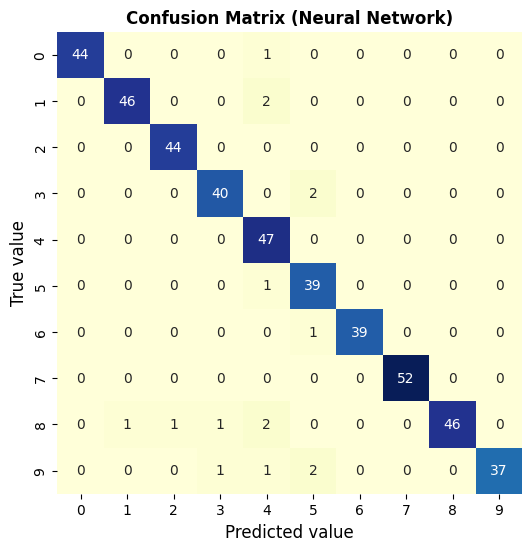

In [23]:
cfm = confusion_matrix(y_test_raw, y_preds)
plt.figure(figsize=(6, 6))

sns.heatmap(cfm, annot=True, cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted value', fontsize=12)
plt.ylabel('True value', fontsize=12)
plt.title('Confusion Matrix (Neural Network)', fontsize=12, weight='semibold');

#### Saving (exporting) the model

Save the model as a single `HDF5` file. [`HDF5` stands for Hierarchical Data Format, v5.]

In [24]:
mlp_path = '../misc/digits_recognition_mlp_model.keras'

mlp6.save(mlp_path)

This saves the trained model and all trackable objects (config, weights, and optimizer) attached to the model.

### Load a saved model

We can load a pre-trained (and saved) model by using `load_model()` function.

In [25]:
from tensorflow.keras.models import load_model

mlp_loaded = load_model(mlp_path)

mlp_loaded.summary()

Model: "mlp_1hidden_adam"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,232 (28.25 KB)

 Trainable params: 2,410 (9.41 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,822 (18.84 KB)

In [26]:
mlp_loaded.optimizer

In [27]:
# use the model that we just loaded to predict values
mlp_loaded.predict(X_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[1.5721264e-15, 9.9999452e-01, 1.3962290e-07, ..., 5.3251608e-09,
        3.1061431e-06, 1.0082396e-11],
       [3.3106679e-10, 1.4387006e-05, 9.9987793e-01, ..., 8.1208353e-11,
        8.2853413e-09, 5.2951794e-09],
       [4.5775086e-13, 1.4202468e-09, 5.0654154e-07, ..., 9.9997449e-01,
        1.8932731e-07, 9.7071426e-09],
       ...,
       [4.7576538e-16, 9.9975377e-01, 1.0026277e-08, ..., 1.0538939e-04,
        1.0486594e-04, 1.6698504e-10],
       [9.9985719e-01, 2.1561546e-11, 2.6790417e-10, ..., 2.3521123e-09,
        1.4045513e-04, 1.6185045e-06],
       [1.6516630e-11, 1.6106965e-11, 9.9094242e-01, ..., 7.4015984e-09,
        4.3331188e-06, 9.9016836e-11]], dtype=float32)

**Useful resources:**
* [Keras: Serialization and saving](https://keras.io/guides/serialization_and_saving/)
* [Keras: Model saving and serialization APIs](https://keras.io/api/models/model_saving_apis/)

#### Visualize the predictions

In [28]:
# grab raw model predictions for the entire dataset
preds_raw = mlp6.predict(digits.data)

# view the first ten predictions
preds_raw[:5]

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step


array([[9.9999750e-01, 1.7776022e-15, 7.2094927e-11, 2.0415943e-08,
        2.5243367e-07, 2.3284572e-09, 8.2159018e-10, 1.7733229e-10,
        1.9584224e-06, 2.8819017e-07],
       [3.0118438e-16, 9.9999845e-01, 2.5491781e-10, 2.5474359e-08,
        2.0859319e-07, 3.1003382e-09, 1.7494902e-08, 5.6836695e-11,
        1.3555626e-06, 3.9811147e-11],
       [2.1864059e-08, 1.9926703e-05, 9.9966264e-01, 9.1385646e-06,
        1.6919282e-09, 1.3031379e-10, 2.8895808e-04, 5.6051390e-09,
        1.9280791e-05, 2.9856688e-09],
       [1.3477295e-07, 6.0081540e-08, 6.4791664e-07, 9.9997354e-01,
        9.7750175e-10, 8.5333741e-06, 3.9908596e-08, 1.3618384e-09,
        2.9382923e-06, 1.4066983e-05],
       [3.6035888e-13, 2.0589614e-07, 1.6710872e-10, 3.9680596e-11,
        9.9999440e-01, 1.0857933e-09, 5.3676558e-06, 5.5903001e-08,
        6.2065117e-09, 1.5143163e-09]], dtype=float32)

In [29]:
# grab the predicted digit (based on the highest probability) for the entire dataset
preds = [np.argmax(pred) for pred in mlp6.predict(digits.data)]

# view the first ten predictions
preds[:10]

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step


[0, 1, 2, 3, 4, 5, 6, 7, 8, 4]

Let's plot the first 100 predictions. The labels are shown in green if the model predicted the digit correcly, otherwise it's shown in red.

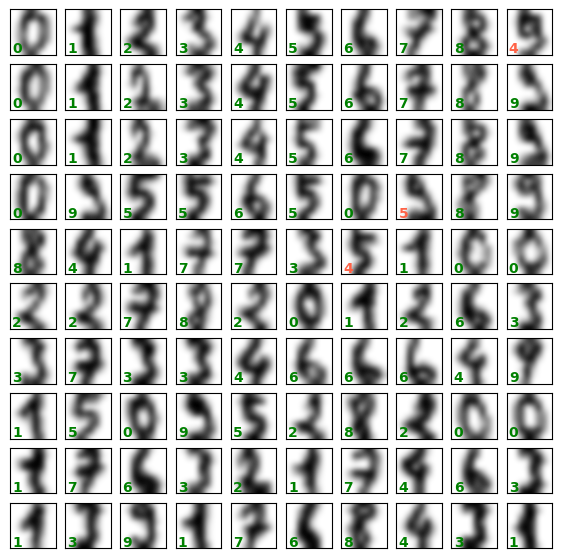

In [30]:
fig, axes = plt.subplots(10, 10, figsize=(7, 7), subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='bicubic')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    pred = preds[i]
    act = y[i]
    if pred == act:
        ax.text(0.05, 0.05, preds[i], color='green',
                weight='semibold', transform=ax.transAxes)
    else:
        ax.text(0.05, 0.05, preds[i], color='tomato',
                weight='semibold', transform=ax.transAxes)
plt.show();